In [2]:
import pandas as pd

df = pd.read_csv('IMDB Dataset.csv')

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
import re 

df['review'] = df['review'].apply(lambda x: re.sub(r'<.*?>', '', x))

In [5]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

TF_IDF_Vectorizer = TfidfVectorizer()

In [7]:
vector = TF_IDF_Vectorizer.fit_transform(df['review'])

In [8]:
print(vector)

  (0, 83379)	0.04357262566995082
  (0, 23205)	0.06890500744917011
  (0, 103304)	0.02925108536144204
  (0, 93784)	0.0534489724825916
  (0, 14748)	0.020807093860782392
  (0, 45127)	0.01947927122297307
  (0, 91957)	0.05766784642024993
  (0, 99027)	0.04861387230791817
  (0, 96133)	0.06629364749440725
  (0, 19173)	0.06791381510834384
  (0, 9325)	0.04193145591846208
  (0, 57750)	0.034367600156771
  (0, 32069)	0.0447491594922111
  (0, 84089)	0.060195918735771126
  (0, 88163)	0.05109618085550132
  (0, 52064)	0.0452667710861851
  (0, 92050)	0.024197222635562416
  (0, 10752)	0.0935177514238415
  (0, 47379)	0.02514289722289664
  (0, 95301)	0.04616964869187316
  (0, 9589)	0.027594886343507062
  (0, 18052)	0.04809095978005667
  (0, 59319)	0.046273521865663025
  (0, 56719)	0.07830867686046718
  (0, 100737)	0.023357284118039143
  :	:
  (49999, 85134)	0.04183086964057225
  (49999, 3935)	0.039348221452236404
  (49999, 47965)	0.02649214725307091
  (49999, 93189)	0.07563744021052388
  (49999, 63879)	0.05

In [9]:
df["sentiment"].replace('positive', 1, inplace=True)
df["sentiment"].replace('negative', 0, inplace=True)

In [10]:
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. The filming tec...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=1)

In [12]:
x_train_selected = TF_IDF_Vectorizer.fit_transform(X_train)

x_test_selected = TF_IDF_Vectorizer.transform(X_test)

In [13]:
from sklearn.naive_bayes import MultinomialNB

NaiveBayes_classifier = MultinomialNB()
NaiveBayes_classifier.fit(x_train_selected, y_train)

MultinomialNB()

In [14]:
y_pred_N = NaiveBayes_classifier.predict(x_test_selected)

In [15]:
from sklearn.metrics import accuracy_score

accuracy_N = accuracy_score(y_test, y_pred_N) * 100

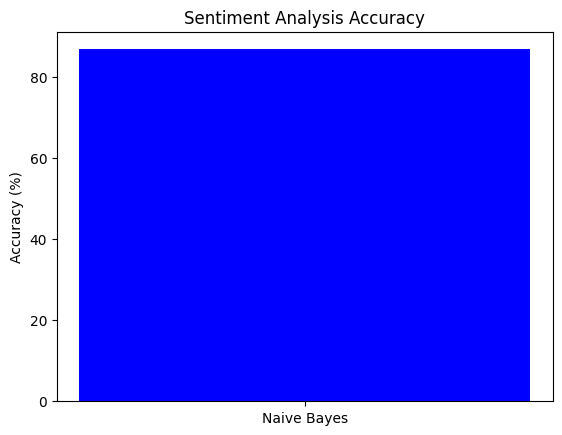

accuracy:86.79%


In [16]:
import matplotlib.pyplot as plt

plt.bar(['Naive Bayes'], [accuracy_N], color='blue')
plt.ylabel('Accuracy (%)')
plt.title('Sentiment Analysis Accuracy')
plt.show()

print(f'accuracy:{accuracy_N}%')

In [17]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf')
svm_model.fit(x_train_selected, y_train)

SVC()

In [18]:
y_pred = svm_model.predict(x_test_selected)

In [19]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred) * 100

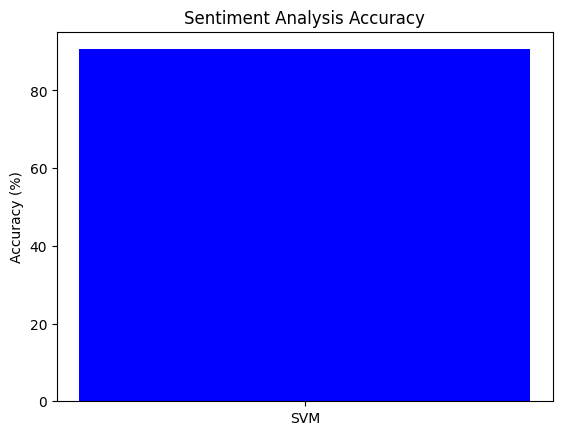

accuracy:90.57%


In [20]:
import matplotlib.pyplot as plt

plt.bar(['SVM'], [accuracy], color='blue')
plt.ylabel('Accuracy (%)')
plt.title('Sentiment Analysis Accuracy')
plt.show()

print(f'accuracy:{accuracy}%')

In [17]:
import pickle

with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(TF_IDF_Vectorizer, f)
with open('naive_bayes_model.pkl', 'wb') as f:
    pickle.dump(NaiveBayes_classifier, f)

"with open('svm_model.pkl', 'wb') as f:\n    pickle.dump(svm_model, f)"